In [2]:
import mysql.connector
import pandas as pd
import pyodbc

import matplotlib.pyplot as plt


import csv


%matplotlib inline


server = 'Yrkmill-trux01'
database = 'TRUX_MT_COMP'
username = 'dwuser'
password = 'TruxRe@d0nly!'


conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'


conn = pyodbc.connect(conn_str)
print("Connection established successfully!")


cursor = conn.cursor()


cursor.execute("SELECT AVG(LM02_BQTY) AS Total  FROM LM02  Where LM02.LM02_date > '2024/01/01' AND LM02.LM02_INOT = 'FALSE' GROUP BY LM02_DATE")


rows = cursor.fetchall()


columns = [column[0] for column in cursor.description]


df = pd.DataFrame.from_records(rows, columns=columns)


print(df)


cursor.close()
conn.close()

Connection established successfully!
        Total
0   35.180000
1   19.871666
2   35.205000
3   35.274444
4   34.425000
5   33.960000
6   35.631111
7   19.841428
8   33.608750
9   34.823333
10  19.782222
11  34.741666
12  34.694000
13  27.480000
14  34.250000
15  34.795000
16  17.683571
17  35.703333
18  34.135714
19  27.214545
20  10.649047
21  34.785833
22  35.327500


<AxesSubplot:>

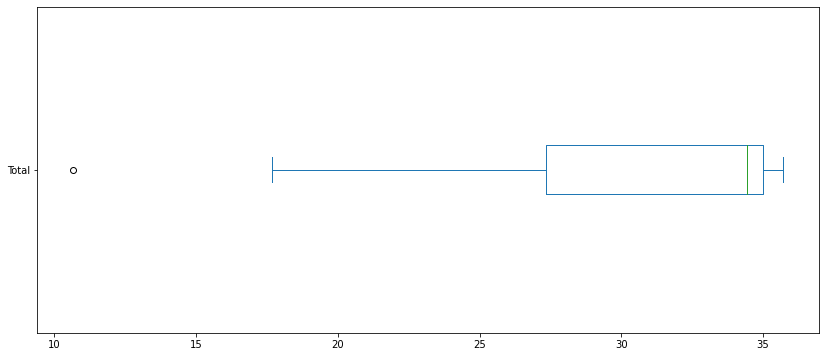

In [3]:
df['Total'] = pd.to_numeric(df['Total'])
df.plot(kind='box', vert = False, figsize=(14,6))